importing Jupyter notebook from data.ipynb
importing Jupyter notebook from measure.ipynb
importing Jupyter notebook from layer.ipynb
importing Jupyter notebook from model.ipynb
importing Jupyter notebook from hyperparameter_selection.ipynb
importing Jupyter notebook from softmax_layer.ipynb
importing Jupyter notebook from classification_model.ipynb
importing Jupyter notebook from measurements.ipynb
program start
x_train.shape: (40000, 784)
y_train.shape: (40000,)
x_test.shape: (10000, 784)
y_train.shape: (10000,)
data loading done
accuracy: -0.0352427888908493
loss: 0.031245135725715658
accuracy: -0.029287703575493734
loss: 0.02734686191586417
accuracy: -0.024029201582025327
loss: 0.02113938433690899
accuracy: -0.023681427406881502
loss: 0.021717065072251747
accuracy: -0.020389456371450416
loss: 0.017716764712783786
accuracy: -0.021109228311916486
loss: 0.01899088681135654
accuracy: -0.018244939953317125
loss: 0.01577489155781371
accuracy: -0.018853032609038266
loss: 0.0166097592741996

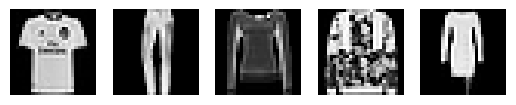

Decoded images:


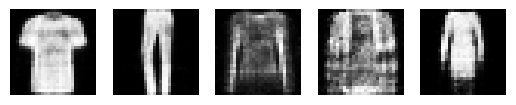

accuracy: -0.04408871635781327
loss: 0.04185597537184968
accuracy: -0.036319703994752504
loss: 0.03433512174102589
accuracy: -0.03126440920879447
loss: 0.029029966081512166
accuracy: -0.026319366254157348
loss: 0.023745838763607224
accuracy: -0.02781236594273357
loss: 0.02560145700203963
accuracy: -0.023617638591497667
loss: 0.021156795048401844
accuracy: -0.02546306789332275
loss: 0.02306667220922902
accuracy: -0.024496418169567068
loss: 0.022075298013449592
accuracy: -0.02125996235233109
loss: 0.018910433984044468
accuracy: -0.020663457004470892
loss: 0.018370986682136548
accuracy: -0.020300473475599958
loss: 0.01795702470320667
accuracy: -0.021922644122029683
loss: 0.019450885678440034
accuracy: -0.020733692539046323
loss: 0.018070229729097165
accuracy: -0.020017481546750347
loss: 0.01754626989307847
accuracy: -0.0194317651637185
loss: 0.01695420472259237
accuracy: -0.018433103177589748
loss: 0.016096569189604108
accuracy: -0.018855545205069803
loss: 0.016406889394798778
accuracy: -

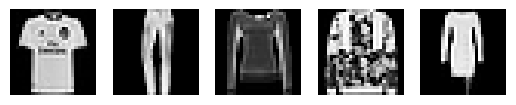

Decoded images:


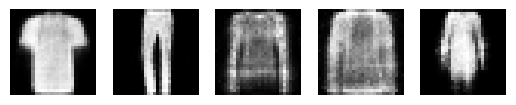

accuracy: -0.061061154755782256
loss: 0.053691155237498636
accuracy: -0.05136028654678859
loss: 0.045609900930755586
accuracy: -0.04609872553458349
loss: 0.041284001217417286
accuracy: -0.04274910929068256
loss: 0.03847693654878301
accuracy: -0.040548038744814704
loss: 0.03627174638160868
accuracy: -0.03860759273359795
loss: 0.03448101262944534
accuracy: -0.038776191197472165
loss: 0.03549434984289537
accuracy: -0.03451518432427968
loss: 0.030632800524989567
accuracy: -0.0347363540063825
loss: 0.031848055841311444
accuracy: -0.030692058647987193
loss: 0.027292640883818494
accuracy: -0.03179600741068926
loss: 0.02902637657625799
accuracy: -0.03044780456213247
loss: 0.027579479359049603
accuracy: -0.027336310283179226
loss: 0.02423473607357378
accuracy: -0.02661499424988233
loss: 0.023560597000594832
accuracy: -0.026259737518053983
loss: 0.023359003605430848
accuracy: -0.025582922768675864
loss: 0.022701682505343518
accuracy: -0.024931085334248326
loss: 0.022068398532682117
accuracy: -0.

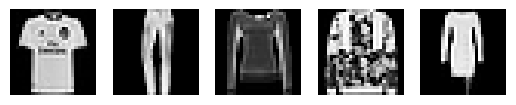

Decoded images:


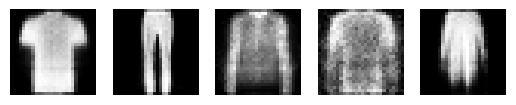

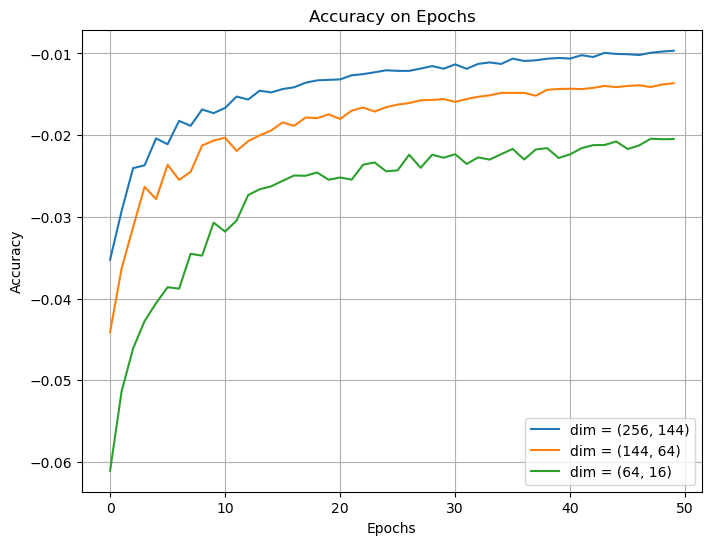

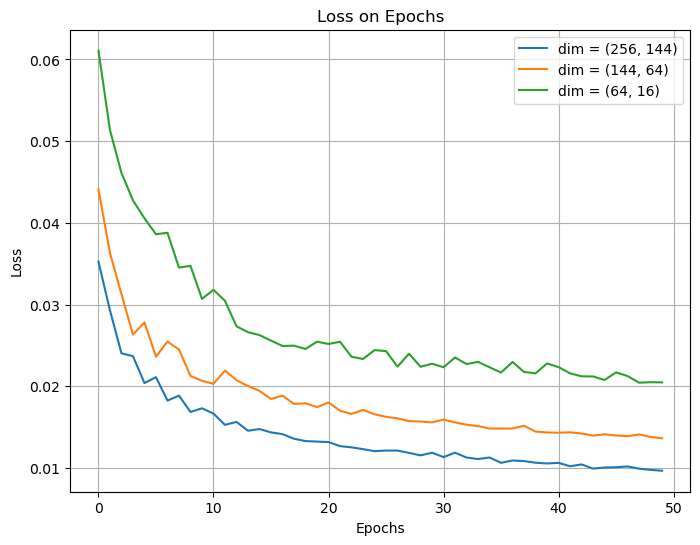

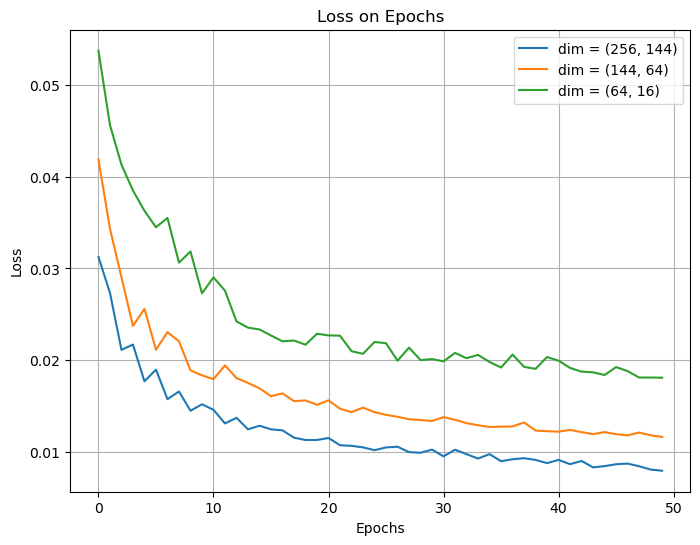

program end


In [1]:
import import_ipynb
import data
import measure
import layer
import model
import hyperparameter_selection as hs
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import umap
import softmax_layer
import classification_model
import measurements

def measure_dimensionality():
    dims = [
        (258, 144),
        (124,64),
        (64,32)
    ]
    
    data1 = data.Data()
    data1.get_data()
    
    input_size = 784
    epochs = 20
    
    for dim in dims:
        layers = [
            layer.Layer(input_size,dim[0],model.relu,model.relu_backward),
            layer.Layer(dim[0],dim[1],model.relu,model.relu_backward),
            layer.Layer(dim[1],dim[0],model.relu,model.relu_backward),
            layer.Layer(dim[0],input_size,model.sigmoid,model.sigmoid_derivative),
        ]
    
        model1 = model.AutoencoderModel(layers,0.01,epochs,50)
        model1.train(data1.X_train, data1.y_train, data1.X_val, data1.y_val) #T
        
        # Predict on test data
        y_pred = model1.predict(data1.X_test.T)
        test_accuracy = model1.get_accuracy(y_pred,data1.X_test.T)
        print("test accuracy:")
        print(test_accuracy)

        # Show graphs
        measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
        measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
        measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")

        plt.imshow(y_pred.T[0].reshape((28,28))*255, cmap='gray')
        plt.axis('off')
        plt.show()
        
   
def classification_modell():
    data1 = data.Data()
    data1.get_data()

    layers = [
        layer.Layer(784,144,model.relu,model.relu_backward),
        layer.Layer(144,64,model.relu,model.relu_backward),
        layer.Layer(64,144,model.relu,model.relu_backward),
        layer.Layer(144,784,model.sigmoid,model.sigmoid_derivative),
    ]
    
    epochs = 20  # 100 is good, but could be better
    model1 = model.AutoencoderModel(layers, 0.01, epochs, 100)
    model1.train(data1.X_train, data1.X_val) #T
    
    code = model1.encode(data1.X_train.T).T
    code2 = model1.encode(data1.X_val.T).T
    code3 = model1.encode(data1.X_test.T).T
    
    layers = [
        layer.Layer(64,124,model.relu,model.relu_backward),
        layer.Layer(124,64,model.relu,model.relu_backward),
        softmax_layer.SoftmaxLayer(64,10)
    ]
    
    epochs = 100
    model2 = classification_model.ClassificationModel(layers, 0.01, epochs, 100)
    model2.train(code, data1.y_train, code2, data1.y_val) #T
    
    # Predict on test data
    y_pred = model2.predict(code3.T)
    test_accuracy = model2.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    model1.graph_hidden_layer()
    model1.umap_image(data1.X_val.T, data1.y_val)
    model1.umap_image(data1.X_test.T, data1.y_test)
    
    # Show graphs
    measure.plot_graph(range(epochs), model2.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model2.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model2.cost_history_train).flatten(), "Train loss")
    
    for i in range(len(y_pred)):
        plt.imshow(y_pred.T[i].reshape((28,28))*255, cmap='gray')
        plt.axis('off')
        plt.show()
    

def c():
    data1 = data.Data()
    data1.get_data()
    
    layers = [
        layer.Layer(784,144,model.relu,model.relu_backward),
        layer.Layer(144,64,model.relu,model.relu_backward),
        softmax_layer.SoftmaxLayer(64,10)
    ]
    
    epochs = 100
    model2 = classification_model.ClassificationModel(layers, 0.01, epochs, 100)
    model2.train(data1.X_train, data1.y_train, data1.X_val, data1.y_val) #T
    
    # Predict on test data
    y_pred = model2.predict(data1.X_test.T)
    test_accuracy = model2.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    model1.graph_hidden_layer()
    model1.umap_image(data1.X_val.T, data1.y_val)
    model1.umap_image(data1.X_test.T, data1.y_test)
    
    # Show graphs
    measure.plot_graph(range(epochs), model2.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model2.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model2.cost_history_train).flatten(), "Train loss")
    
    plt.imshow(y_pred.T[2].reshape((28,28))*255, cmap='gray')
    plt.axis('off')
    plt.show()
    

def autoencoder_model():
    data1 = data.Data()
    data1.get_data()
    
    input_size = 784
    output_size_1 = 144
    
    layers = [
        layer.Layer(input_size,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,64,model.relu,model.relu_backward),
        layer.Layer(64,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,input_size,model.sigmoid,model.sigmoid_derivative),
    ]
    
    epochs = 20  # 100 is good, but could be better
    model1 = model.AutoencoderModel(layers, 0.01, epochs, 10)
    model1.train(data1.X_train, data1.X_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.X_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    model1.graph_hidden_layer()
    model1.umap_image(data1.X_train.T, data1.y_train)
    model1.umap_image(data1.X_val.T, data1.y_val)
    model1.umap_image(data1.X_test.T, data1.y_test)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    
#     plt.imshow(y_pred.T[2].reshape((28,28))*255, cmap='gray')
#     plt.axis('off')
#     plt.show()

    # Plot the original test images 
    print("Original test images:")
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(data1.X_test[i].reshape((28,28))*255, cmap='gray')
        plt.axis('off')

    plt.show()

    # Plot the decoded 
    print("Decoded images:")
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(y_pred.T[i].reshape((28,28))*255, cmap='gray')
        plt.axis('off')

    plt.show()
    
    
def autoencoder_model_with_l1():
    data1 = data.Data()
    data1.get_data()
    
    input_size = 784
    output_size_1 = 144
    
    layers = [
        layer.Layer(input_size,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,64,model.relu,model.relu_backward),
        layer.Layer(64,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,input_size,model.sigmoid,model.sigmoid_derivative),
    ]
    
    epochs = 20  # 100 is good, but could be better
    model1 = model.AutoencoderModel(layers, 0.01, epochs, 10, is_l1=True)
    model1.train(data1.X_train, data1.X_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.X_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    model1.graph_hidden_layer()
    model1.umap_image(data1.X_val.T, data1.y_val)
    model1.umap_image(data1.X_test.T, data1.y_test)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    
    plt.imshow(y_pred.T[2].reshape((28,28))*255, cmap='gray')
    plt.axis('off')
    plt.show()
    


def autoencoder_model_with_noise():
    data1 = data.Data()
    data1.get_data()
    
    input_size = 784
    output_size_1 = 144
    
    layers = [
        layer.Layer(input_size,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,64,model.relu,model.relu_backward),
        layer.Layer(64,output_size_1,model.relu,model.relu_backward),
        layer.Layer(output_size_1,input_size,model.sigmoid,model.sigmoid_derivative),
    ]
    
    epochs = 20  # 100 is good, but could be better
    model1 = model.AutoencoderModel(layers, 0.01, epochs, 10, is_noisy=True)
    model1.train(data1.X_train, data1.X_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.X_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    model1.graph_hidden_layer()
    model1.umap_image(data1.X_val.T, data1.y_val)
    model1.umap_image(data1.X_test.T, data1.y_test)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    
    plt.imshow(y_pred.T[2].reshape((28,28))*255, cmap='gray')
    plt.axis('off')
    plt.show()
    

if __name__ == '__main__':
    print("program start")
    
#     autoencoder_model()
#     measure_dimensionality()
#     classification_modell()
#     c()

    measurements.measure_dimensionality()
    
    print("program end")